In [4]:
%conda install -c fastai fastai

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /root/miniconda3/envs/paddle_learn

  added / updated specs:
    - fastai


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.7           |   py38ha9d4c09_0         125 KB
    brotli-1.0.9               |       h5eee18b_7          18 KB
    brotli-bin-1.0.9           |       h5eee18b_7          19 KB
    catalogue-1.0.0            |           py38_1          16 KB
    contourpy-1.0.5            |   py38hdb19cb5_0         203 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    cymem-2.0.6                |   py38h295c915_0          41 KB
    cython-blis-0.7.9          |   py38h7deecbd_0         7.3

In [6]:
import fastai
from fastai import *
from fastai.vision.all import *
# from fastai.vision import *
import torch
print(torch.__version__)
print(fastai.__version__)

2.2.1
2.7.14


# 4.3 fastai
## 4.3.1 fastai介绍
### fastai库
fastai将训练一个准确的神经网络变得十分简单。fastai库是基于他的创始人Jeremy Howard 等人开发的 Deep Learning 课程深度学习的研究，为计算机视觉、文本、表格数据、时间序列、协同过滤等常见深度学习应用提供单一、一致界面的深度学习库，可以做到开箱即用。这意味着，如果你已经学会用fastai创建实用的计算机视觉（CV）模型，那你就可以用同样的方法创建自然语言处理（NLP）模型，或是其他模型。

fastai 是目前把易用性和功能都做到了极致的深度学习框架，正如Jeremy所说的：如果一个深度学习框架需要写个教程给你，那它的易用性还不够好。Jeremy 说这话，不是为了夸自己，因为他甚至做了个 MOOC 出来。他自己评价说目前 fastai 的易用性依然不算成功。但在我看来它的门槛极低，你可以很轻易用几句话写个图片分类模型出来，人人都能立即上手，你甚至不需要知道深度学习的理论。


### fast.ai课程

上面说到了课程，这里对fast.ai的课程做一个简单的介绍：
课程是由kaggle赛事老司机，连续两年冠军Jeremy Howard 和 Rachel Tomas 联合创办，旨在让更多人能接受深度学习的课程，而且是完全免费！真的是业界良心，这两年深度学习火了起来，国内有培训机构推出收费课程了，教学水平参差不齐。而Jeremy和Rachel推出的课程，恰恰提现了他们的教育理念：`Make deep learning uncool ! （让深度学习变得没那么高大上）`
Fast.ai给人的印象一直很“接地气”：
- 研究如何快速、可靠地把最先进的深度学习应用于实际问题。
- 提供Fast.ai库，它不仅是让新手快速构建深度学习实现的工具包，也是提供最佳实践的一个强大而便捷的资源。
- 课程内容简洁易懂，以便尽可能多的人从研究成果和软件中收益。

### Github
这个官方的Github包含了fastai的所有内容 https://github.com/fastai 


## 4.3.2 fastai实践
### MNIST
我们还是以最简单的MNIST来入手看看fastai都为我们做了什么

In [7]:
# 使用fastai内置的MNIST数据集，这里会从fastai的服务器下载
path = untar_data(URLs.MNIST_SAMPLE)

URLs.MNIST_SAMPLE 只提供了3和7 两个分类的数据，这个是用来做演示的，我们正好也做个演示

这里如果下载很慢的话，那么我们可以手动进行操作（建议这样，比程序下载快很多而且稳定）
```
#进入我们用户目录，创建以下的目录
mkdir -p ~/.fastai/data
cd ~/.fastai/data
# 下载解压
wget -c http://files.fast.ai/data/examples/mnist_sample.tgz
tar -zxvf mnist_sample.tgz
```
完成后重新执行上面的命令即可

In [10]:
from fastai.vision.data import ImageDataLoaders

#使用ImageDataBunch从刚才的目录中将读入数据
data = ImageDataLoaders.from_folder(path)

In [11]:
# 可以看一下data里面有什么？
data

In [13]:
# 使用cnn_learner来创建一个learn，这里模型我们选择resnet18，使用的计量方法是accuracy准确率
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

/root/miniconda3/envs/paddle_learn/lib/python3.8/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [17]:
#可以直接使用train_ds来访问数据集里面的数据
img,label = data.train_ds[0]
print(label)
img

TensorCategory(1)


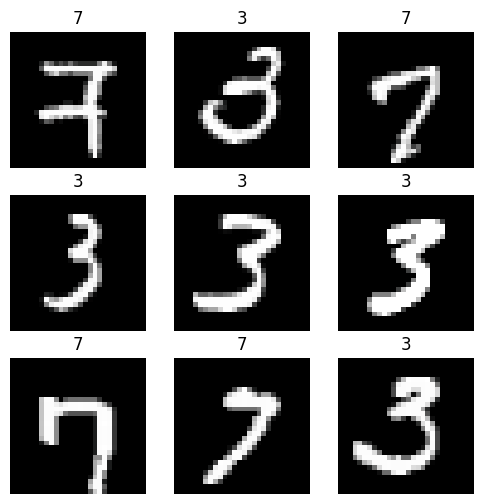

In [22]:
#或者我们直接使用show_batch方法，连标签都给我们自动生成好了
data.show_batch(max_n=9, figsize=(6,6))

这里也是直接下载PyTorch官方提供的resnet18与训练模型

`wget -P /Users/tant/.torch/models/ https://download.pytorch.org/models/resnet18-5c106cde.pth`

In [23]:
# 使用learn的fit方法就可以进行训练了，训练一遍
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time


经过上面的训练，你一定会很纳闷：
- 没有告诉模型类别有几个
- 没有指定任务迁移之后接续的几个层次的数量、大小、激活函数
- 没有告诉网络损失函数是什么
我几乎没有提供任何的信息，网络就开始训练了？

对，不需要。

因为 fastai 根据你输入的上述“数据”、“模型结构”和“损失度量”信息，自动帮你把这些闲七杂八的事情默默搞定了。

下面再介绍一些训练的高级用法

In [25]:
#从新生成一个数据集
learn2 = cnn_learner(data, models.resnet18, metrics=accuracy)

这里我们使用fit_one_cycle方法。

fit_one_cycle使用的是一种周期性学习率，从较小的学习率开始学习，缓慢提高至较高的学习率，然后再慢慢下降，周而复始，每个周期的长度略微缩短，在训练的最后部分，允许学习率比之前的最小值降得更低。这不仅可以加速训练，还有助于防止模型落入损失平面的陡峭区域，使模型更倾向于寻找更平坦的极小值，从而缓解过拟合现象。

In [26]:
learn2.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time


我们使用内置ShowGraph的方法直接打印训练的状态，如果我们需要更详细的状态，可以直接调用一下的方法：

In [27]:
# 学习率的变更
learn2.recorder.plot_lr()

AttributeError: 'Sequential' object has no attribute 'plot_lr'

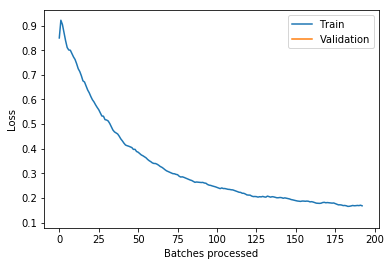

In [12]:
#损失
learn2.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


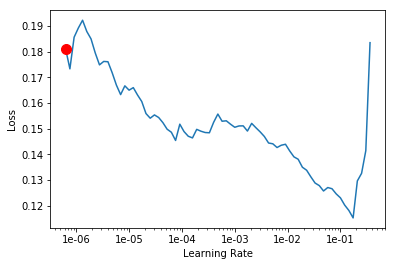

In [13]:
# 我们也可以使用lr_find()找到损失仍在明显改善最高学习率
learn2.lr_find()
learn2.recorder.plot()

## 4.3.3 fastai文档翻译
由于fastai的中文资料很少而且目前官方只提供英文的文档，所以如果谁有兴趣一起翻译的话可以联系我，如果人数够了的话可以组个团队一起翻译。